In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('df.csv')
df_alao_july12_16= pd.DataFrame(df.loc[984:1103,'ground_alao'].reset_index(drop=True))

#################14th august tunshi clear day#################
df_3km = pd.read_csv('alao_clearday_test_3km.csv')
df_9km = pd.read_csv('alao_clearday_test_9km.csv')
t = np.arange(0,24,1)
dt = pd.DataFrame(t,columns=['time'])
dt_merge=pd.concat([dt,dt,dt,dt,dt],axis=0)
dt_merge.reset_index(inplace=True)

x = np.arange(0,121,1)
y_tkm = np.repeat(x, 180)
y_nkm = np.repeat(x, 60)
df_y_tkm = pd.DataFrame(y_tkm,columns=['time'])
df_y_nkm = pd.DataFrame(y_nkm,columns=['time'])
tkm = pd.concat([df_y_tkm,df_3km], axis=1)
nkm = pd.concat([df_y_nkm,df_9km], axis=1)
test3km = tkm.groupby(['time']).mean()
test9km = nkm.groupby(['time']).mean()
test_concat = pd.concat([test3km,test9km], axis=1)
df_all = pd.concat([dt_merge,test3km,test9km,df_alao_july12_16], axis=1)
df_all.reset_index(inplace=True)
#df_all['time']= df_all['index']
del df_all['level_0']
del df_all['index']
#df_all.tail()
df_all.drop(df_all.tail(1).index,inplace=True)
df_all
d=np.arange(12,17,1)
dr = np.repeat(d, 24)
df_all['days']=dr
df_all

,time,rrtmg_clearday_alao_3km,dudhia_clearday_alao_3km,goddard_clearday_alao_3km,goddard_old_clearday_alao_3km,rrtmg_clearday_alao_9km,dudhia_clearday_alao_9km,goddard_clearday_alao_9km,goddard_old_clearday_alao_9km,ground_alao,days
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,12
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,12
2,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,12
3,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,12
4,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016,12
...,...,...,...,...,...,...,...,...,...,...,...
115,19.0,675.093093,683.828218,686.382530,705.478118,674.776103,721.886373,688.369835,741.059321,873.925,16
116,20.0,522.295358,531.439685,526.355104,554.632319,513.577687,559.628020,521.235404,581.536867,689.447,16
117,21.0,330.101944,332.660347,336.213991,362.886179,312.858193,352.151181,321.257430,380.925699,455.836,16
118,22.0,125.025014,123.710895,129.960695,149.170831,110.882165,131.254594,115.638246,157.491862,185.259,16


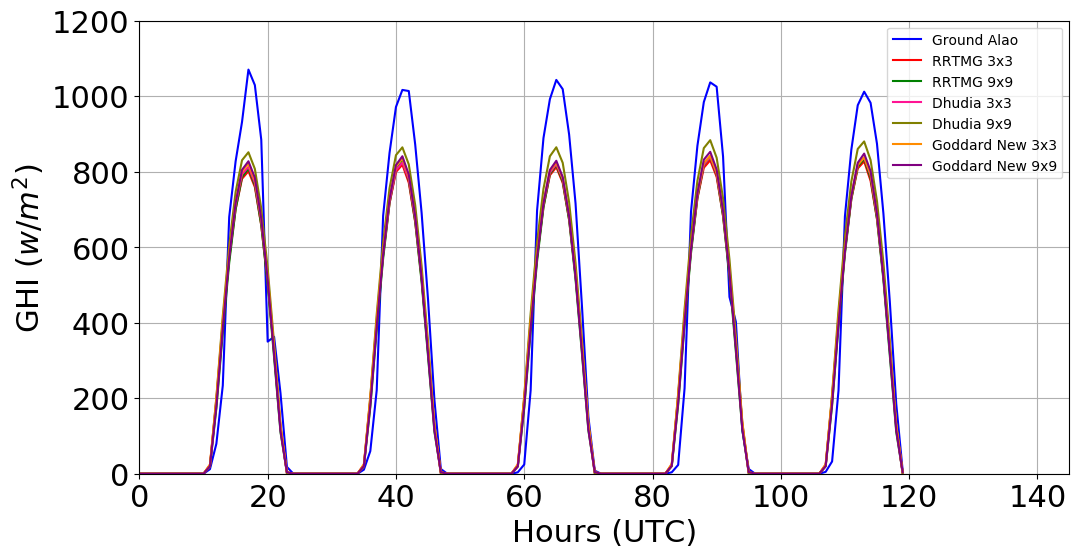

In [3]:
plt.figure(figsize=(12,6),dpi=100)
plt.plot(df_all.ground_alao,'b',label='Ground Alao')
plt.plot(df_all.rrtmg_clearday_alao_3km,'r',label='RRTMG 3x3')
plt.plot(df_all.rrtmg_clearday_alao_9km,'g',label='RRTMG 9x9')
plt.plot(df_all.dudhia_clearday_alao_3km,'deeppink',label='Dhudia 3x3')
plt.plot(df_all.dudhia_clearday_alao_9km,'olive',label='Dhudia 9x9')
plt.plot(df_all.goddard_clearday_alao_3km,'darkorange',label='Goddard New 3x3')
plt.plot(df_all.goddard_clearday_alao_9km,'purple',label='Goddard New 9x9')
plt.legend(fontsize=10,loc='upper right')
plt.xlabel('Hours (UTC)', fontsize=22)
plt.ylabel('GHI ($w/m^2$)',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.ylim(0,1200)
plt.xlim(0,145)
plt.show()
#plt.savefig('ghi_12_16_july_alao.png',dpi=200)


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['rrtmg_clearday_alao_3km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['rrtmg_clearday_alao_3km'] ) )
    return pd.Series( dict(  MAE_RRTMG_3 = MAE, RMSE_RRTMG_3 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
RRTMG_3=stat
RRTMG_3

,days,MAE_RRTMG_3,RMSE_RRTMG_3
0,12,72.557727,115.666717
1,13,73.966346,112.474112
2,14,79.388654,123.191688
3,15,64.585341,103.824543
4,16,71.277270,108.066323


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['rrtmg_clearday_alao_9km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['rrtmg_clearday_alao_9km'] ) )
    return pd.Series( dict(  MAE_RRTMG_9 = MAE, RMSE_RRTMG_9 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
RRTMG_9=stat
del RRTMG_9['days']
RRTMG_9

,MAE_RRTMG_9,RMSE_RRTMG_9
0,71.388344,113.261732
1,73.157731,110.826682
2,79.224724,122.093700
3,62.001480,100.001897
4,70.905264,106.648256


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['goddard_clearday_alao_3km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['goddard_clearday_alao_3km'] ) )
    return pd.Series( dict(  MAE_Goddard_3 = MAE, RMSE_Goddard_3 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
Goddard_3=stat
del Goddard_3['days']
Goddard_3

,MAE_Goddard_3,RMSE_Goddard_3
0,68.826665,109.914969
1,69.722294,106.019783
2,76.265501,118.527656
3,62.620166,100.361091
4,68.605654,104.131133


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['goddard_clearday_alao_9km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['goddard_clearday_alao_9km'] ) )
    return pd.Series( dict(  MAE_Goddard_9 = MAE, RMSE_Goddard_9 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
Goddard_9=stat
del Goddard_9['days']
Goddard_9

,MAE_Goddard_9,RMSE_Goddard_9
0,67.738278,107.031002
1,69.518701,104.989047
2,76.404291,117.525099
3,59.557465,95.532776
4,67.591352,101.524172


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['dudhia_clearday_alao_9km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['dudhia_clearday_alao_9km'] ) )
    return pd.Series( dict(  MAE_Dhudia_9 = MAE, RMSE_Dhudia_9 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
Dhudia_9=stat
del Dhudia_9['days']
Dhudia_9

,MAE_Dhudia_9,RMSE_Dhudia_9
0,62.921005,101.536123
1,61.918965,94.685024
2,66.499390,103.613401
3,54.920120,89.103774
4,58.060407,90.144255


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['dudhia_clearday_alao_3km'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['dudhia_clearday_alao_3km'] ) )
    return pd.Series( dict(  MAE_Dhudia_3 = MAE, RMSE_Dhudia_3 = RMSE ) )

stat=df_all.groupby( 'days' ).apply( r2_rmse ).reset_index()
Dhudia_3=stat
del Dhudia_3['days']
Dhudia_3

,MAE_Dhudia_3,RMSE_Dhudia_3
0,70.355519,112.131210
1,71.972642,109.268561
2,77.549098,119.925818
3,62.756770,100.890251
4,68.643460,104.074220


In [10]:
df_concat= pd.concat([RRTMG_3,RRTMG_9,Dhudia_3,Dhudia_9,Goddard_3,Goddard_9],axis=1)
df_T=df_concat.T
# df_T.columns = df_T.iloc[0]
df_T.drop(df_T.head(1).index, inplace=True)
df_T.columns = ['July 12','July 13','July 14','July 15','July 16']
df_T

,July 12,July 13,July 14,July 15,July 16
MAE_RRTMG_3,72.557727,73.966346,79.388654,64.585341,71.277270
RMSE_RRTMG_3,115.666717,112.474112,123.191688,103.824543,108.066323
MAE_RRTMG_9,71.388344,73.157731,79.224724,62.001480,70.905264
RMSE_RRTMG_9,113.261732,110.826682,122.093700,100.001897,106.648256
MAE_Dhudia_3,70.355519,71.972642,77.549098,62.756770,68.643460
RMSE_Dhudia_3,112.131210,109.268561,119.925818,100.890251,104.074220
MAE_Dhudia_9,62.921005,61.918965,66.499390,54.920120,58.060407
RMSE_Dhudia_9,101.536123,94.685024,103.613401,89.103774,90.144255
MAE_Goddard_3,68.826665,69.722294,76.265501,62.620166,68.605654
RMSE_Goddard_3,109.914969,106.019783,118.527656,100.361091,104.131133


<Figure size 1200x600 with 0 Axes>

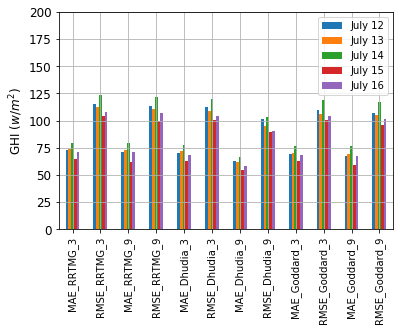

In [12]:
plt.figure(figsize=(12,6),dpi=100)
df_T.plot(kind='bar')
#plt.xlabel('',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=12)
plt.ylim(0,200)
plt.legend(fontsize=10,loc='upper right')
plt.grid()
plt.show()

In [6]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

# d1=rmse(day1.ground_alao,day1.rrtmg_clearday_alao_3km)
# d2=rmse(day2.ground_alao,day2.rrtmg_clearday_alao_3km)
# d3=rmse(day3.ground_alao,day3.rrtmg_clearday_alao_3km)
# d4=rmse(day4.ground_alao,day4.rrtmg_clearday_alao_3km)


d1=rmse(df_all.iloc[0:24,:].ground_alao,df_all.iloc[0:24,:].rrtmg_clearday_alao_9km)
d2=rmse(df_all.iloc[24:48,:].ground_alao,df_all.iloc[24:48,:].rrtmg_clearday_alao_9km)
d3=rmse(df_all.iloc[48:72,:].ground_alao,df_all.iloc[48:72,:].rrtmg_clearday_alao_9km)
d4=rmse(df_all.iloc[72:96,:].ground_alao,df_all.iloc[72:96,:].rrtmg_clearday_alao_9km)
d5=rmse(df_all.iloc[96:120,:].ground_alao,df_all.iloc[96:120,:].rrtmg_clearday_alao_9km)
array = [d1,d2,d3,d4,d5]
array


[113.26173203513298,
 110.82668193269242,
 122.09370020966038,
 100.0018969667039,
 106.64825598150364]

In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_all.iloc[0:24,:].ground_alao,df_all.iloc[0:24,:].rrtmg_clearday_alao_9km)

71.38834422222219

In [44]:
cd = pd.read_csv('RMSE_rad_schemes_alao.txt',delim_whitespace=True,header=None)
cd.columns=['RMSE','July 12','July 13','July 14','July 15','July 16']
#cd.set_index('RMSE',inplace=True)
cd.set_index('RMSE',inplace=True)
cd

,July 12,July 13,July 14,July 15,July 16
RMSE,,,,,
RRTMG_3,115.666717,112.474112,123.191688,103.82,108.066323
RRTMG_9,113.261732,110.826682,122.093700,100.00,106.648256
dhudia_3,112.131210,109.268561,119.925818,100.89,104.074220
Dhudia_9,101.536123,94.685024,103.613401,89.10,90.144255
Goddard_old_3,106.140753,99.016132,111.996254,96.99,96.591118
Goddard_old_9,99.206454,87.744811,99.481565,89.03,85.925920
Goddard_new_3,109.914969,106.019783,118.527656,100.36,104.131133
Goddard_new_9,107.031002,104.989047,117.525099,95.53,101.524172


<Figure size 1200x600 with 0 Axes>

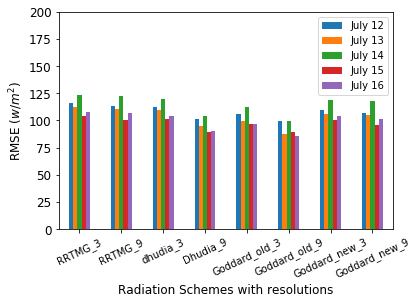

In [65]:
plt.figure(figsize=(12,6),dpi=100)
cd.plot(kind='bar')
plt.xlabel('Radiation Schemes with resolutions',fontsize=12)
plt.ylabel('RMSE ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=10,rotation=25)
plt.yticks(fontsize=12)
plt.ylim(0,200)
plt.legend(fontsize=10,loc='upper right')
plt.show()
#plt.savefig('RMSE_clearsky_july_alao.png',dpi=100)

No handles with labels found to put in legend.


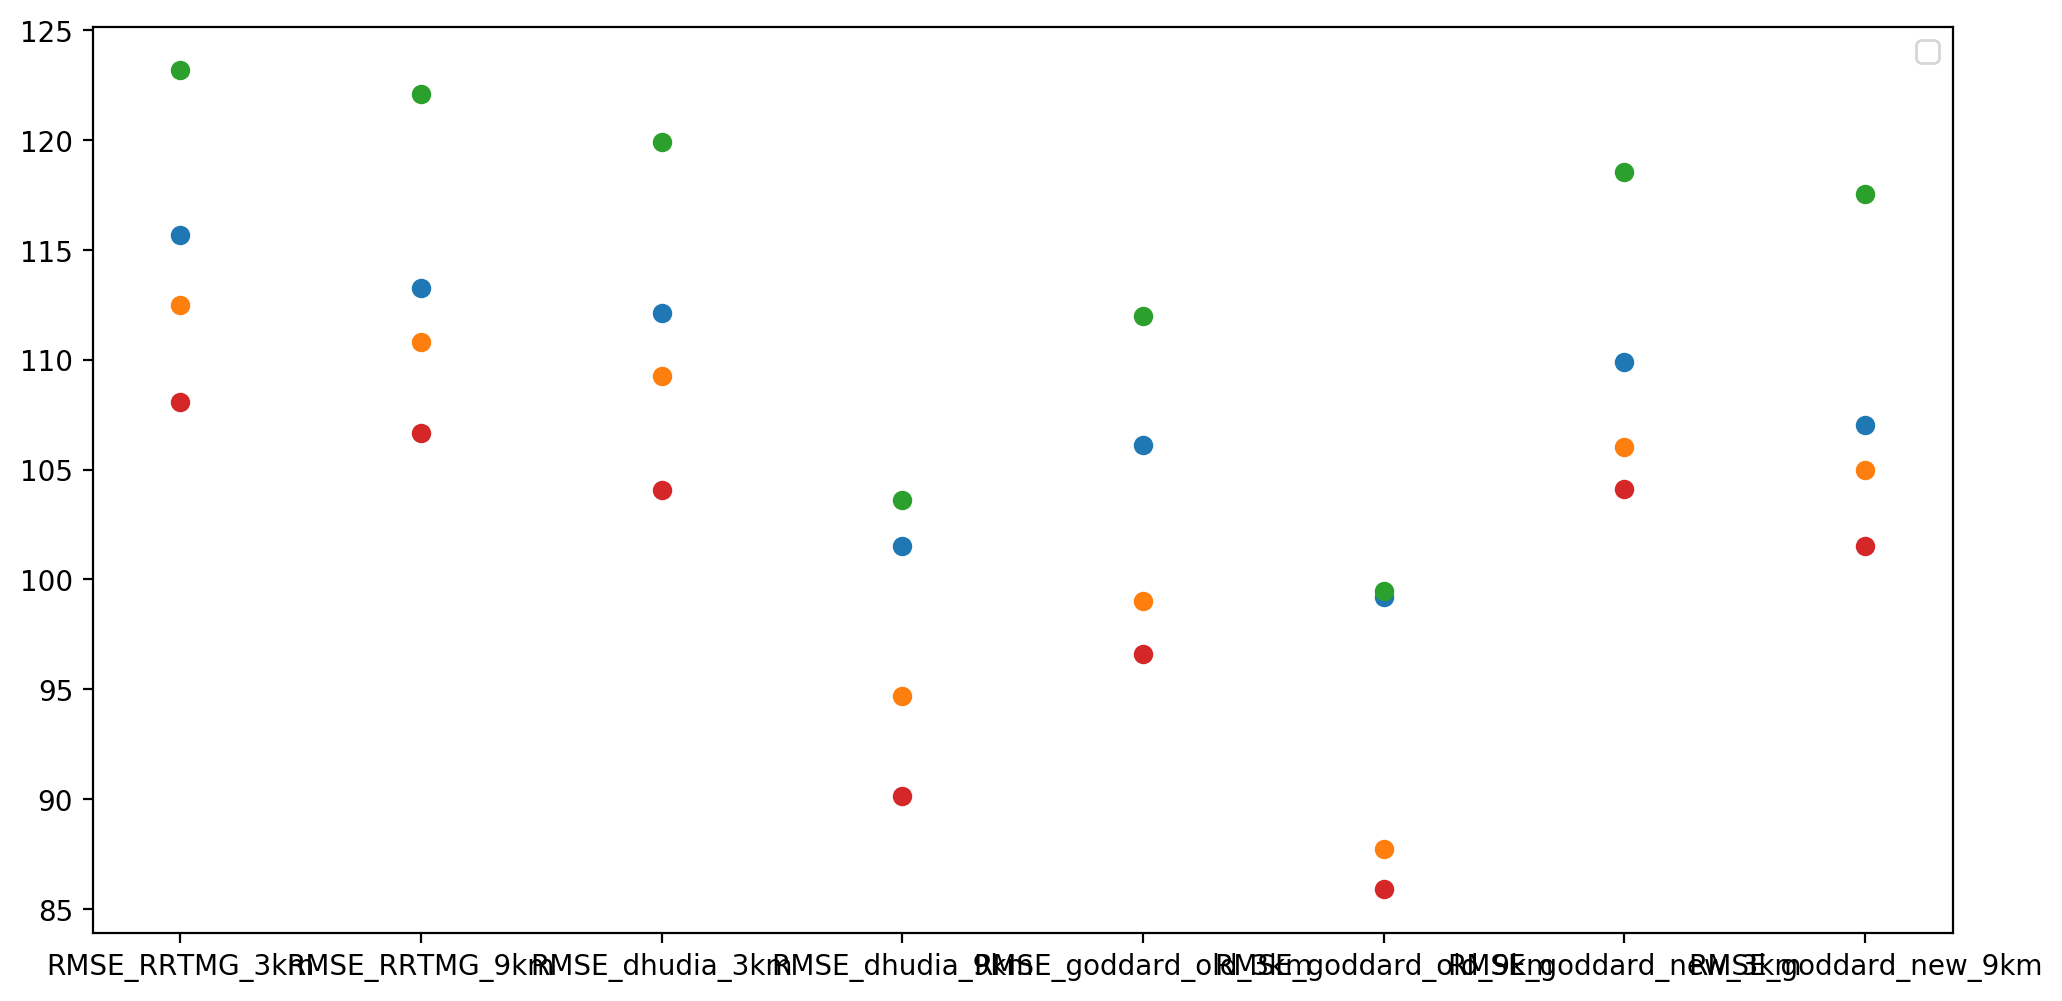

In [8]:
plt.figure(figsize=(12,6),dpi=200)
plt.scatter(cd.RMSE,cd.July_12)
plt.scatter(cd.RMSE,cd.July_13)
plt.scatter(cd.RMSE,cd.July_14)
plt.scatter(cd.RMSE,cd.July_15)
plt.legend()
plt.show()

In [9]:
# day1=df_3km.iloc[0:4320,:]
# day2=df_3km.iloc[4320:8640,:]
# day3=df_3km.iloc[8620:12960,:]
# day4=df_3km.iloc[12960:17280,:]
# day5=df_3km.iloc[17280:21600,:]

In [15]:
# def RE_parcent(obs,model):
#     RE = ((model-obs)*100)/obs
#     RE1=np.where(RE>100, 0, RE)
#     RE2=np.where(RE1<-99, 0, RE1)
#     RE3=np.nan_to_num(RE2)
#     return RE3
def RE_parcent(obs,model):
    RE = ((model-obs)*100)/obs
    RE1=np.where(RE>200, 200, RE)
#    RE2=np.where(RE<-99, 0, RE)
    RE3=np.nan_to_num(RE1)
    return RE3
rrtmg_3=RE_parcent(df_all.ground_alao,df_all.rrtmg_clearday_alao_3km)
rrtmg_9=RE_parcent(df_all.ground_alao,df_all.rrtmg_clearday_alao_9km)
dhudia_3=RE_parcent(df_all.ground_alao,df_all.dudhia_clearday_alao_3km)
dhudia_9=RE_parcent(df_all.ground_alao,df_all.dudhia_clearday_alao_9km)
goddard_old_3=RE_parcent(df_all.ground_alao,df_all.goddard_old_clearday_alao_3km)
goddard_old_9=RE_parcent(df_all.ground_alao,df_all.goddard_old_clearday_alao_9km)
goddard_new_3=RE_parcent(df_all.ground_alao,df_all.goddard_clearday_alao_3km)
goddard_new_9=RE_parcent(df_all.ground_alao,df_all.goddard_clearday_alao_9km)

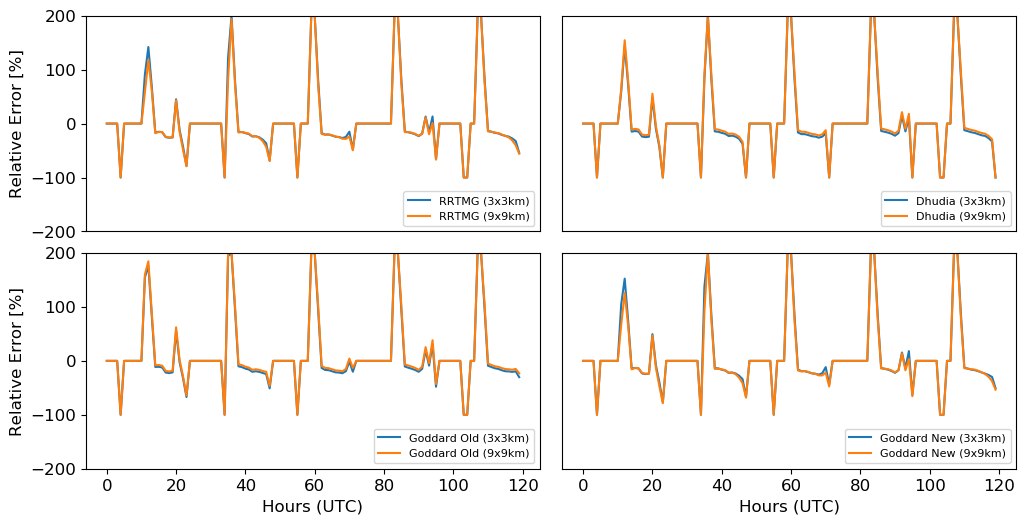

In [16]:

plt.figure(figsize=(12,6),dpi=100)
plt.subplot(221)
plt.plot(rrtmg_3,label='RRTMG (3x3km)')
plt.plot(rrtmg_9,label='RRTMG (9x9km)')
plt.legend(fontsize=8,loc='lower right')
plt.xticks([])
plt.yticks(fontsize=12)
#plt.grid(True)
#plt.xlim(0,25)
plt.ylim(-200,200)
plt.ylabel('Relative Error [%]',fontsize=12)
plt.subplot(222)
plt.plot(dhudia_3,label='Dhudia (3x3km)')
plt.plot(dhudia_9,label='Dhudia (9x9km)')
plt.legend(fontsize=8,loc='lower right')
#plt.xlim(0,25)
plt.ylim(-200,200)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.subplot(223)
plt.plot(goddard_old_3,label='Goddard Old (3x3km)')
plt.plot(goddard_old_9,label='Goddard Old (9x9km)')
plt.legend(fontsize=8,loc='lower right')
plt.xlabel('Hours (UTC)',fontsize=12)
#plt.xlim(0,25)
plt.ylim(-200,200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative Error [%]',fontsize=12)
#plt.grid(True)
plt.subplot(224)
plt.plot(goddard_new_3,label='Goddard New (3x3km)')
plt.plot(goddard_new_9,label='Goddard New (9x9km)')
plt.xlabel('Hours (UTC)',fontsize=12)
#plt.xlim(0,25)
plt.ylim(-200,200)
plt.legend(fontsize=8,loc='lower right')
plt.xticks(fontsize=12)
plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.1)

#plt.grid(True)
plt.show()